### Module 1 : Simulating Two Neutral Atom Qubits Coupling with QuTip

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from atom_basis import *
from hamiltonian_builder import construct_TD_SAHam
from qutip import mesolve

#### Set up parameters

In [ ]:
atom0_ham_params = dict(Omega_01 = 0, delta_1 = 0, Omega_r = 10, Delta_r = 0) # in MHz
atom1_ham_params = dict(Omega_01 = 0, delta_1 = 0, Omega_r = 0, Delta_r = 0) # in MHz
lindblad_params = dict(gamma_r = 0.2, b_0r = 1/16, b_1r = 1/16, b_dr = 7/8)
coupling_params = dict(Rydberg_B = [0, 1, 5, 10, 30, 50, 100, 400])
num_B = len(coupling_params['Rydberg_B'])

#### Construct Hamiltonian

In [6]:
# Basis states for a single atom
state0 = basis(4, 0)
state1 = basis(4, 1)
stater = basis(4, 2)
stated = basis(4, 3)

# list of wanted operators
expect_op_list = [
  tensor(state1 * state1.dag(), qeye(4)),  # atom 0 in |1>
  tensor(stater * stater.dag(), qeye(4)),  # atom 0 in |r>
]

#### Try the initial state $|10\rang$

In [7]:
# initial state
psi0 = tensor(state1, state0)  # |1> for atom 0 and |0> for atom 1
# print(psi0)
# time list
tlist = np.linspace(0, 50, 500)  # in microseconds

result_list = []
for Rydberg_B in coupling_params['Rydberg_B']:
  # total Hamiltonian and collapse operators
  H_total, collapse_list = construct_two_atom_hamiltonian(atom0_ham_params, atom1_ham_params,\
                                                          lindblad_params, Rydberg_B)

  # Solve the master equation
  result = mesolve(H_total, psi0, tlist, collapse_list, expect_op_list)
  result_list.append((Rydberg_B,result))

d:\anaconda3\envs\my_qiskit\Lib\site-packages\qutip\solver\solver_base.py:583: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


#### Plot time evolution of the population of the $|0\rangle$ and $|1\rang$ states for qubit 0

In [ ]:
# Global plotting defaults (feel free to tweak)
plt.rcParams.update({
    'figure.dpi': 200,
    'savefig.dpi': 300,
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'legend.fontsize': 9,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'lines.linewidth': 2.0,
    "font.size": 10,
})
plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:
# Add this as a new cell in the notebook

def plot_populations(xlabel=r"Time ( $\mu$s )", ylabel="Population", title_prefix=""):
    """
    Plots the population evolution for different Rydberg blockade strengths using global variables.

    Assumes global variables: result_list, tlist, coupling_params, num_B.
    """
    fig, axes = plt.subplots(num_B, 1, figsize=(10, 2 * num_B), sharex=True, sharey=True, constrained_layout=True)
    axes = axes.ravel()
    
    for ax, (Rydberg_B, res) in zip(axes, result_list):
        ax.plot(tlist, res.expect[0], label=r"pop of $|1\rangle$", linewidth=0.75)
        ax.plot(tlist, res.expect[1], label=r"pop of $|r\rangle$", linewidth=0.75, alpha=0.6)
        ax.set_title(rf"B = {Rydberg_B} MHz")
        ax.grid(True, alpha=0.3)
    
    axes[-1].set_xlabel(xlabel)
    axes[-1].set_ylabel(ylabel)
    
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right", ncol=2, frameon=True)
    if title_prefix:
        fig.suptitle(title_prefix)
    plt.show()

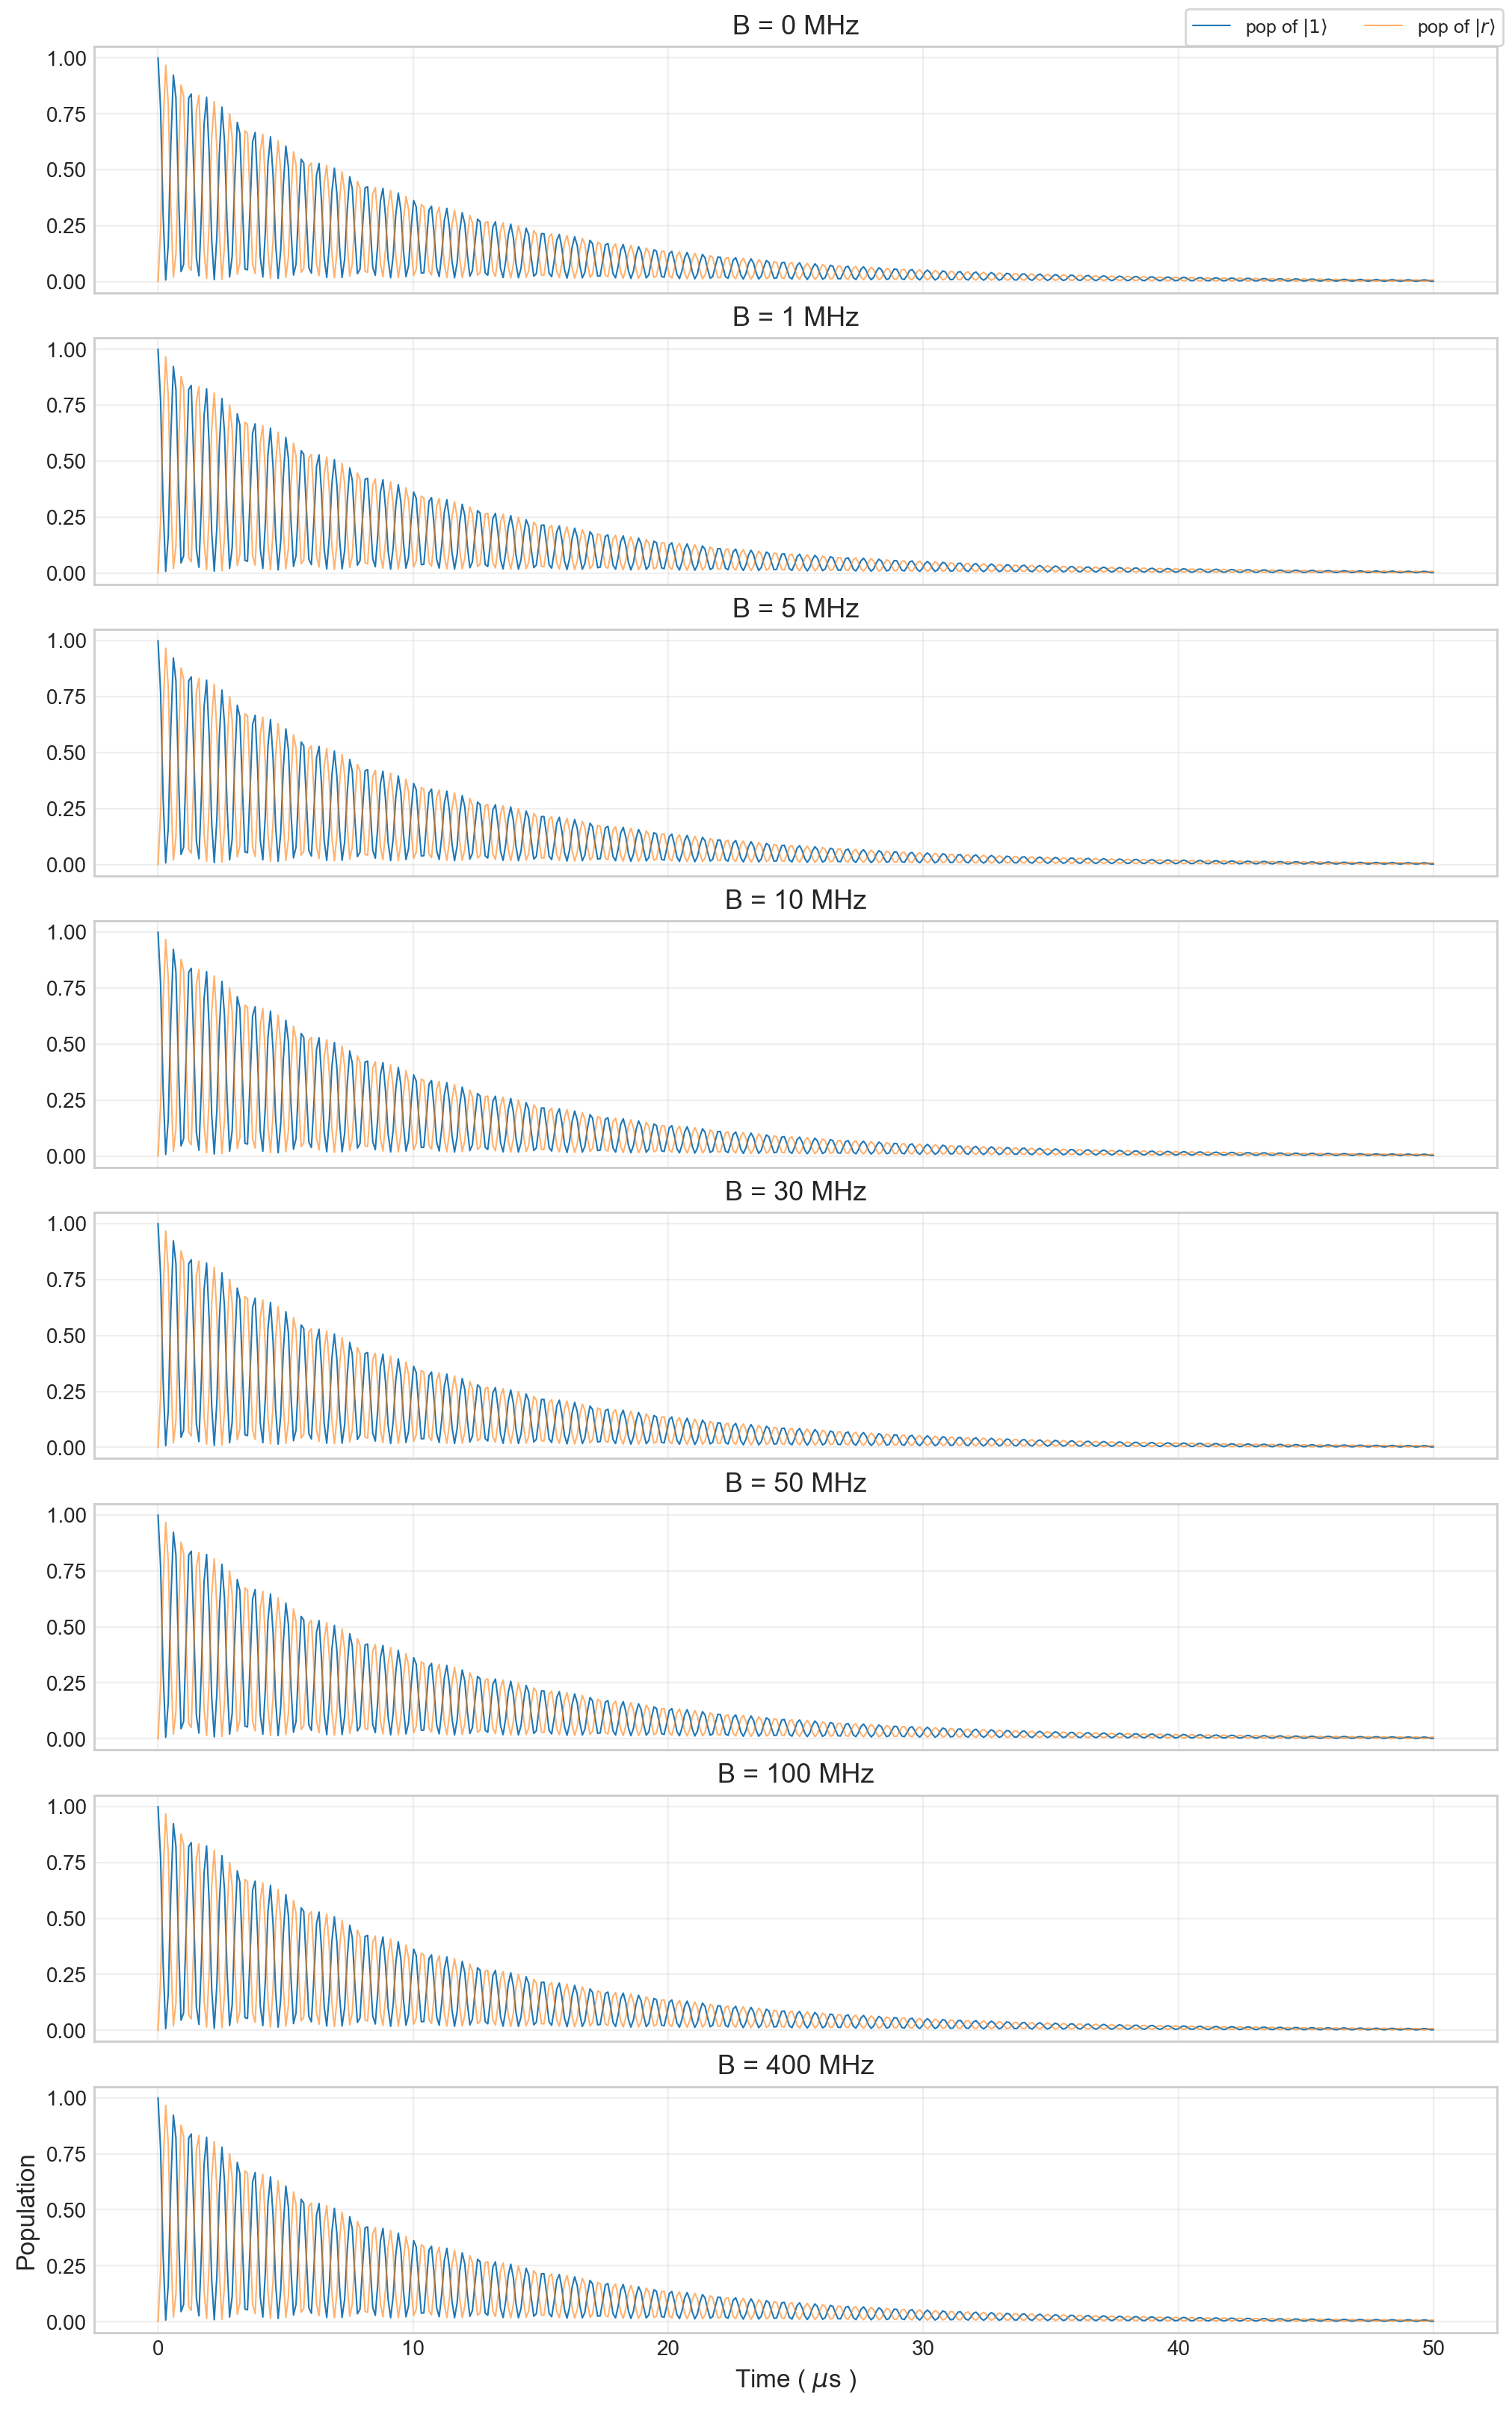

In [9]:
plot_populations(xlabel=r"Time ( $\mu$s )", ylabel="Population", title_prefix="")

#### Try the initial state $|1r\rang$

In [10]:
# run
# initial state
psi0 = tensor(state1, stater)  # |1> for atom 0 and |0> for atom 1
# print(psi0)
# time list
tlist = np.linspace(0, 50, 500)  # in microseconds

result_list = []
for Rydberg_B in coupling_params['Rydberg_B']:
  # total Hamiltonian and collapse operators
  H_total, collapse_list = construct_two_atom_hamiltonian(atom0_ham_params, atom1_ham_params,\
                                                          lindblad_params, Rydberg_B)

  # Solve the master equation
  result = mesolve(H_total, psi0, tlist, collapse_list, expect_op_list)
  result_list.append((Rydberg_B,result))

d:\anaconda3\envs\my_qiskit\Lib\site-packages\qutip\solver\solver_base.py:583: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


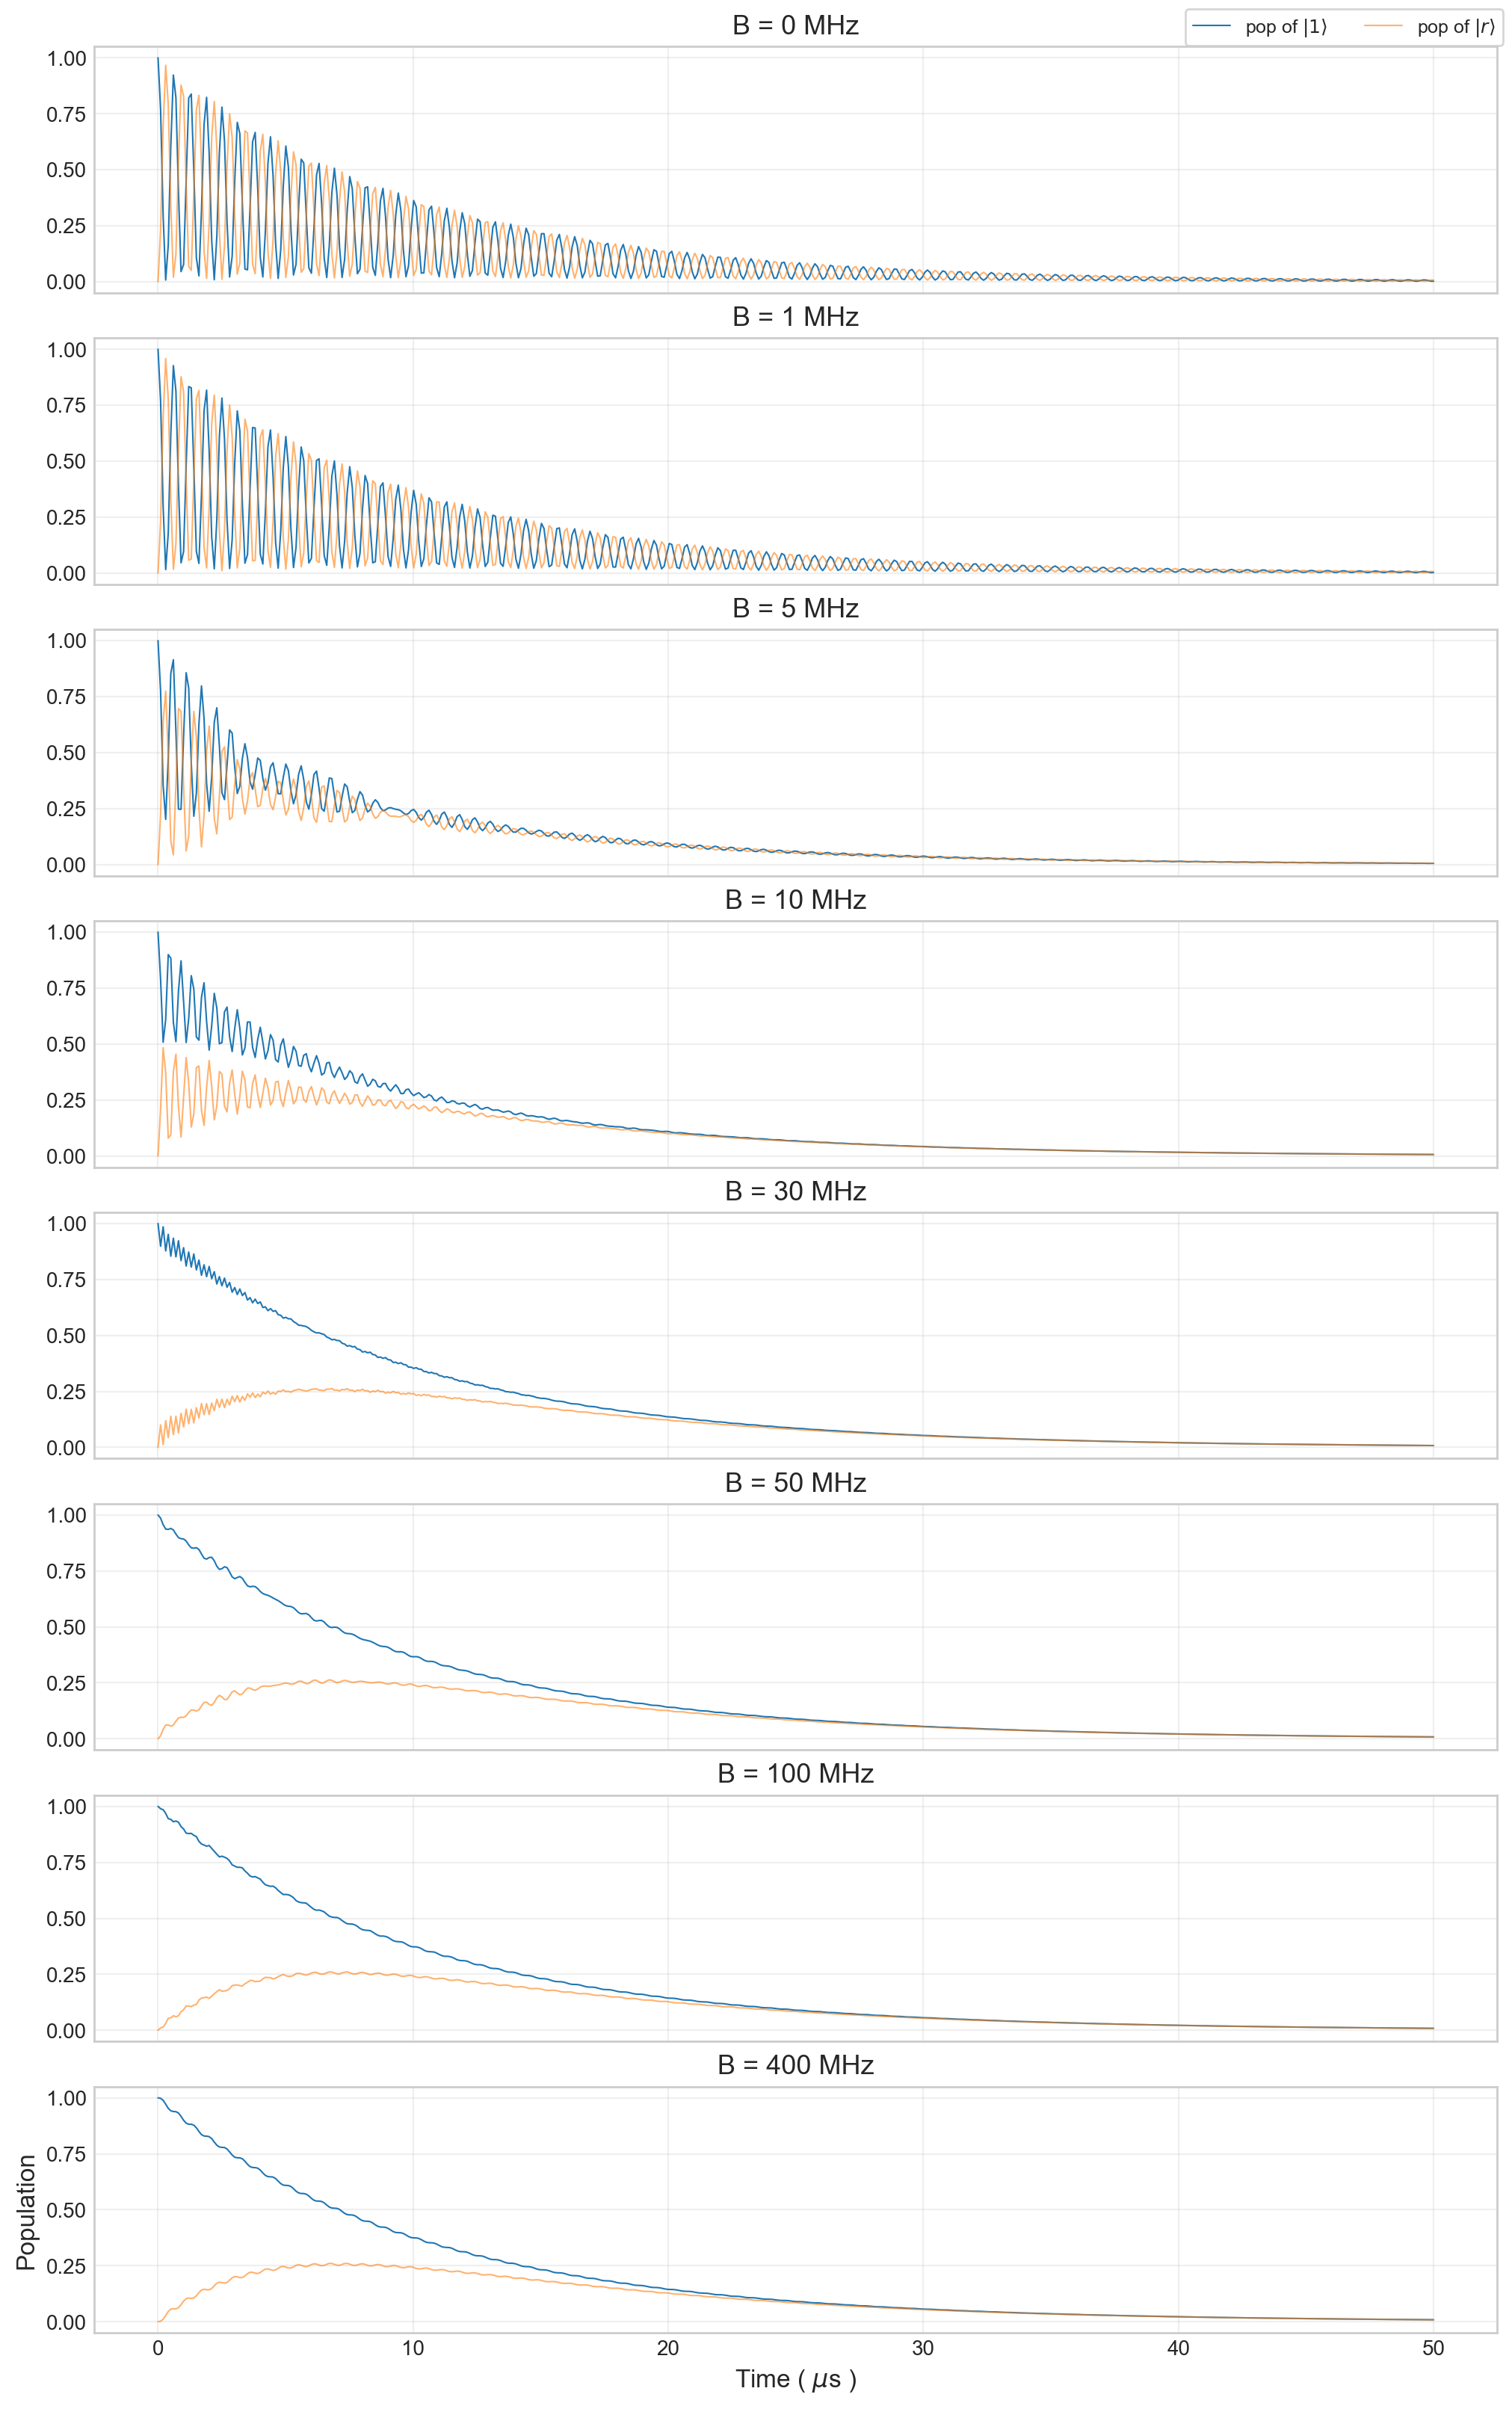

In [12]:
plot_populations(xlabel=r"Time ( $\mu$s )", ylabel="Population", title_prefix="")

#### Try the initial state $|10\rang$ with $\gamma_r = 0$

In [13]:
# run
# initial state
psi0 = tensor(state1, state0)  # |1> for atom 0 and |0> for atom 1
# print(psi0)
# time list
tlist = np.linspace(0, 50, 500)  # in microseconds

result_list = []
for Rydberg_B in coupling_params['Rydberg_B']:
  # total Hamiltonian and collapse operators
  H_total, collapse_list = construct_two_atom_hamiltonian(atom0_ham_params, atom1_ham_params,\
                                                          lindblad_params, Rydberg_B)

  # Solve the master equation
  result = mesolve(H_total, psi0, tlist, [], expect_op_list) # without dissipation
  result_list.append((Rydberg_B,result))

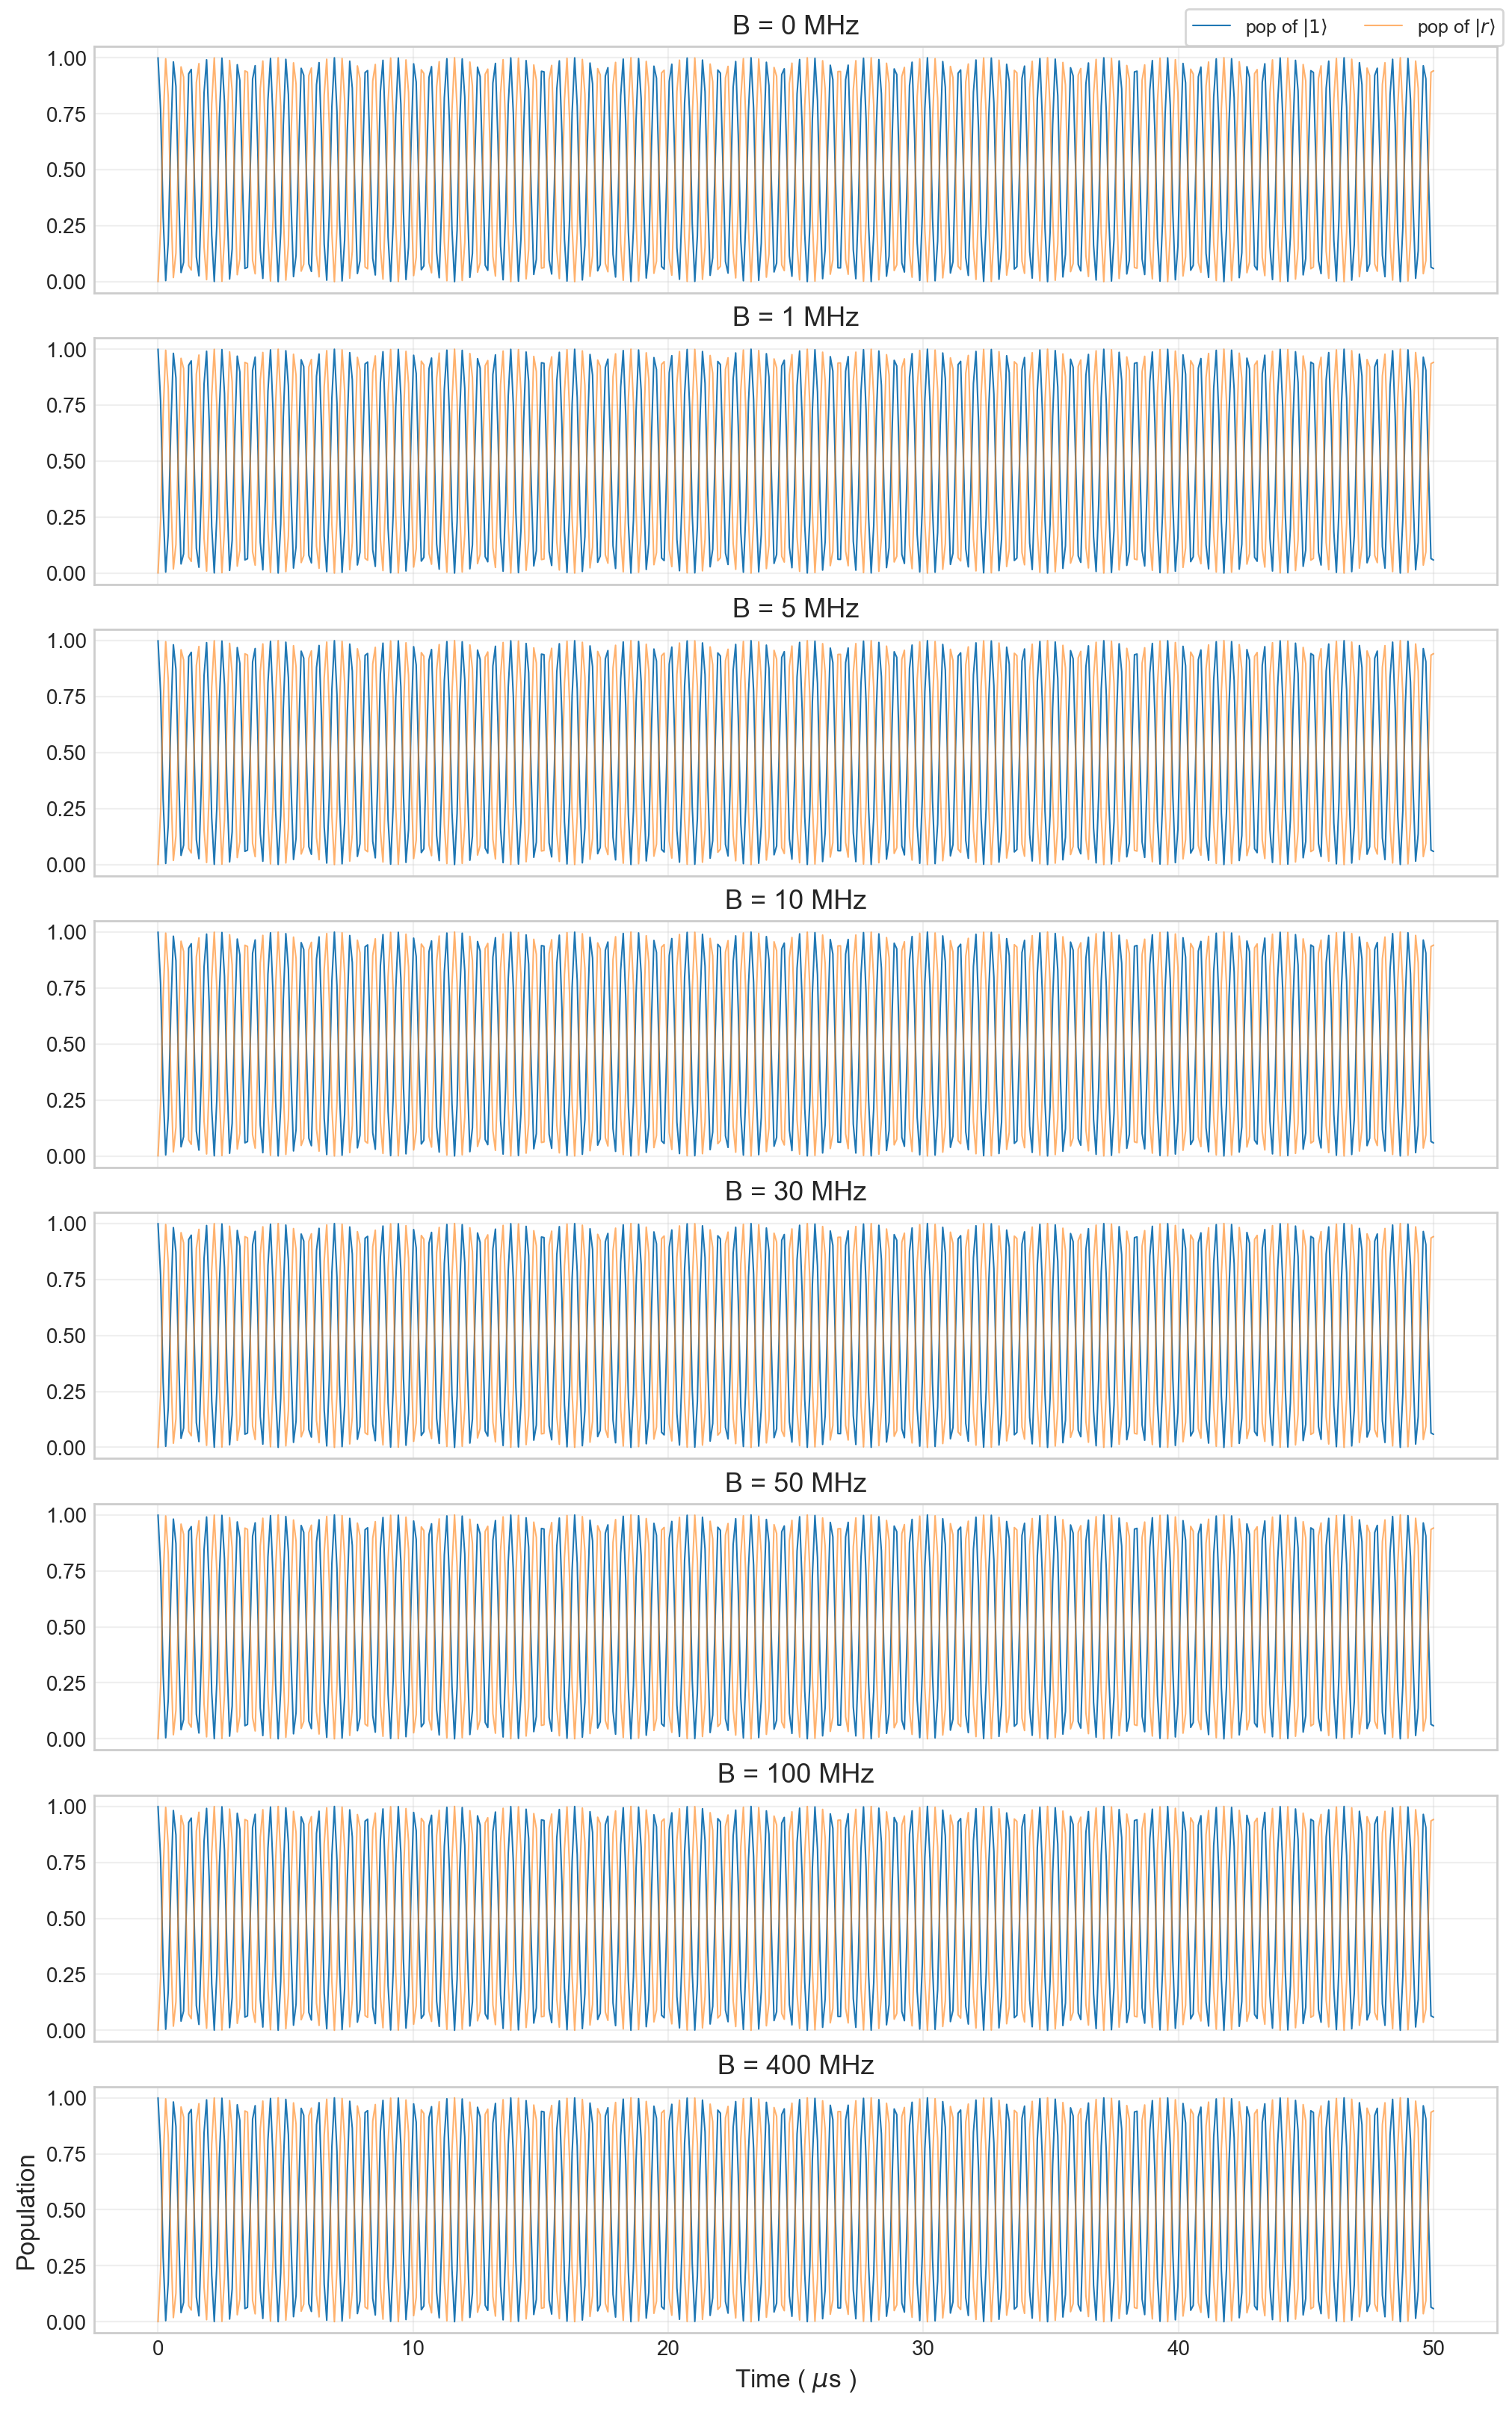

In [14]:
plot_populations(xlabel=r"Time ( $\mu$s )", ylabel="Population", title_prefix="")

#### Try the initial state $|1r\rang$ with $\gamma_r = 0$

In [15]:
# run
# initial state
psi0 = tensor(state1, stater)  # |1> for atom 0 and |0> for atom 1
# print(psi0)
# time list
tlist = np.linspace(0, 50, 500)  # in microseconds

result_list = []
for Rydberg_B in coupling_params['Rydberg_B']:
  # total Hamiltonian and collapse operators
  H_total, collapse_list = construct_two_atom_hamiltonian(atom0_ham_params, atom1_ham_params,\
                                                          lindblad_params, Rydberg_B)

  # Solve the master equation
  result = mesolve(H_total, psi0, tlist, [], expect_op_list) # without dissipation
  result_list.append((Rydberg_B,result))

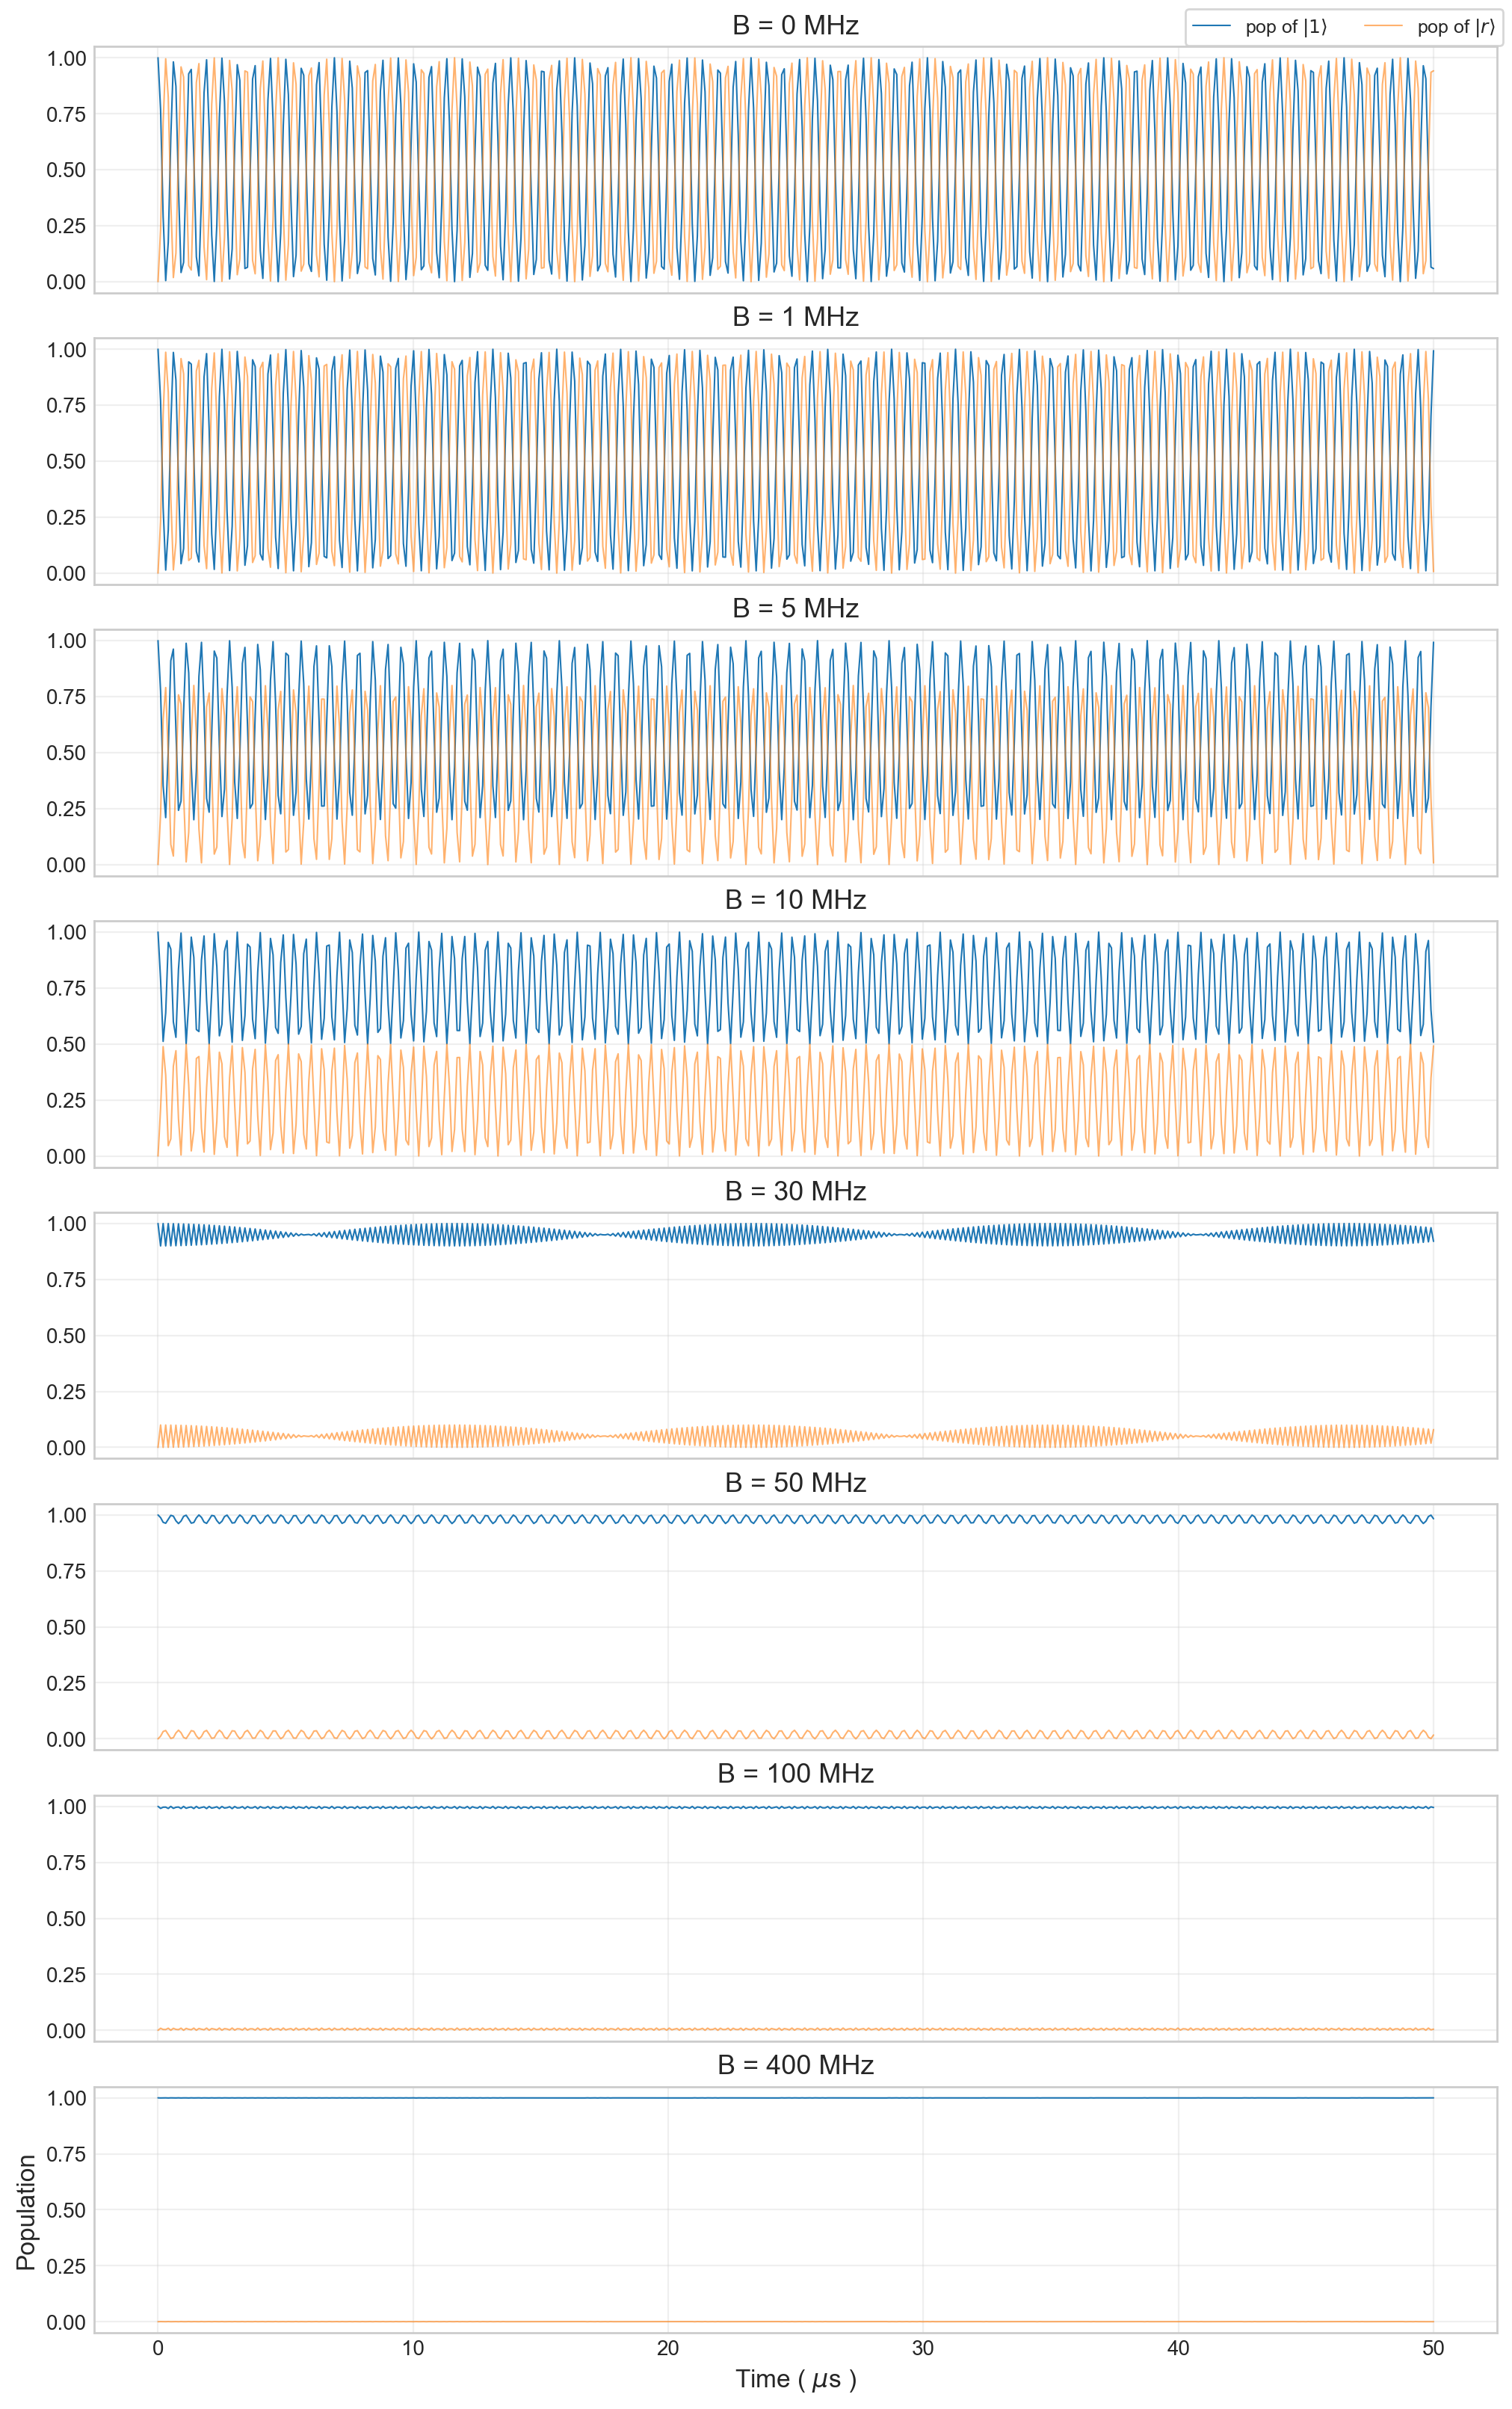

In [16]:
plot_populations(xlabel=r"Time ( $\mu$s )", ylabel="Population", title_prefix="")